# Mini Project
Author : PGPBDA.B.AUG17_SLE Mini Project Group 2
    
    1. Akshay Kumar
    2. Manjeet Panda, 
    3. Rohit S Adhikari
    4. Vineet Saini

Modified Date: 28th January 2017

# Case Study:
## Campaign for selling personal loans 
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. 

The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

Data Set - Bank_Personal_Loan_Modelling-1.xlsxView

# To Do:
1. Read the column description and ensure you understand each attribute well.
2. Study the data distribution in each attribute, share your findings.
3. Get the target column distribution. Your comments.
4. Split the data into training and test set in the ratio of 70:30 respectively.
5. Use a classification model to predict the likelihood of a liability customer buying personal loans.
6. Explain why you chose one model over the other (do not use ensemble techniques yet).
7. Use ensemble techniques to improve the performance.

## Understanding:
1. Data Ingestion
2. Study Data
3. Think about which model should be employed and the reason behind this.
4. Build two or more models and comapre the model performance to check which is a better model.
    = Employ the different stages of data analysis for both the models and build the models and compare the results.
5. Use ensemble techniques to improve performance

#### Load important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

plt.style.use('seaborn-white')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Ingestion and Initial Exploration

In [2]:
xl = pd.ExcelFile('Bank_Personal_Loan_Modelling.xlsx')
print("The different sheets present in the Excel Workbook:\n")
print(xl.sheet_names)
df = xl.parse("Data")
print("\n\nA glimpse at the first few records of the date:\n")
print(df.head())
print('\n\nThe different datatypes in the dataset are as follows:\n')
print(df.dtypes)
print('\n\nInformation about the dataset:\n')
print(df.info())
print('\n\nNumber of (rows,columns):\n')
print(df.shape)
print('\n\nCentral tendencies of different attributes:\n')
print(df.describe())
#Check for Null Values
print('\n\nIs there any null value in the dataset?')
print(df.isnull().values.any())

The different sheets present in the Excel Workbook:

['Description', 'Data']


A glimpse at the first few records of the date:

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0

From the above results and given instructions, we get to know that:
1. Dependent Variable: 'Personal Loan'
2. There are 5000 records and 14 columns in the dataset.
2. All the categorical and continuous variables are in integer format except for Credit Card Average Spending(CCAvg) which is in floating decimal point format.
3. There are no null values in the datase.
4. However, Experience has negative values which does not make any sense. We can impute the negative values to zero as the age group of rows with negative experience matches to the age group of rows having Zero experience.

In [3]:
# Impute negative experience with Zero Experience
i = 0
for i in range(0,5000):
    if(df.Experience[i] < 0):
        df['Experience'][i] = 0

print('\n\nAfter Experience Imputation:\n')
print(df.describe())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """




After Experience Imputation:

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.119600    73.774200  93152.503000   
std    1443.520003    11.463166    11.440484    46.033729   2121.852197   
min       1.000000    23.000000     0.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       

The minimum values for Experience is now zero, which makes sense now.

## The question before further data exploration and analysis is what model to build on this data.
Logistic Regression Pros:
1. Convenient probability scores for observations
2. Multi-collinearity is not really an issue and can be countered with L2 regularization to an extent

Decision Tree:
1. Intuitive Decision Rules
2. Can handle non-linear features
3. Take into account variable interactions

#### We will have to explore the data further and see their distribution and interactions in the feature space to ascertian whihc kind of classification should be best used.
#### Or, we can try to build the two classification models and compare the model performance and scores to pick one.

0    4520
1     480
Name: Personal Loan, dtype: int64


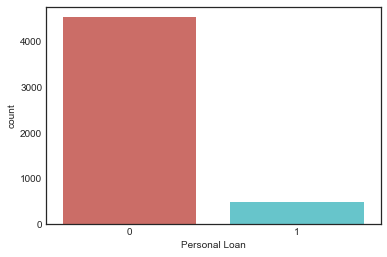

In [4]:
print(df['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan', data = df, palette = 'hls')
plt.show()

There are 480 people of 5000 people accepted the personal loan.

In [5]:
print(df.groupby('Personal Loan').mean())

                        ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0              2512.165487  45.367257   20.148894   66.237389  93152.428761   
1              2390.650000  45.066667   19.843750  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0              2.373451  1.728982   1.843584   51.789381            0.102212   
1              2.612500  3.905347   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917  


This give us a sense of data across the people who accepted loan and who did not.
1. There is not much of a significant difference between the age and experience of people in the two classes even though the people who accepted the loan seem to be mariginally younger and of less experience than people who did not.
2. People with higher Income levels have accepted the loan.
3. Though the data for ZIP code cannot be inferred much, but it seems to suggest that thre is no particular geography where people of the two classes seem to have been concentrated.
4. People taking a personal loan seem to have a larger family than peple not accepting loan.
4. The average credit card spending of people opting for loans is greater.
5. People accepting personal loan seem to have a higher education.
6. People accpeting personal loan have a higher Mortgage value.
7. People accepting personal loan seem to have higher number of Certificate of Deposit Account with the bank.
8. They also seem to have marginally more securities account, Online Banking Facilities and Credit Cards.

# Pairplot

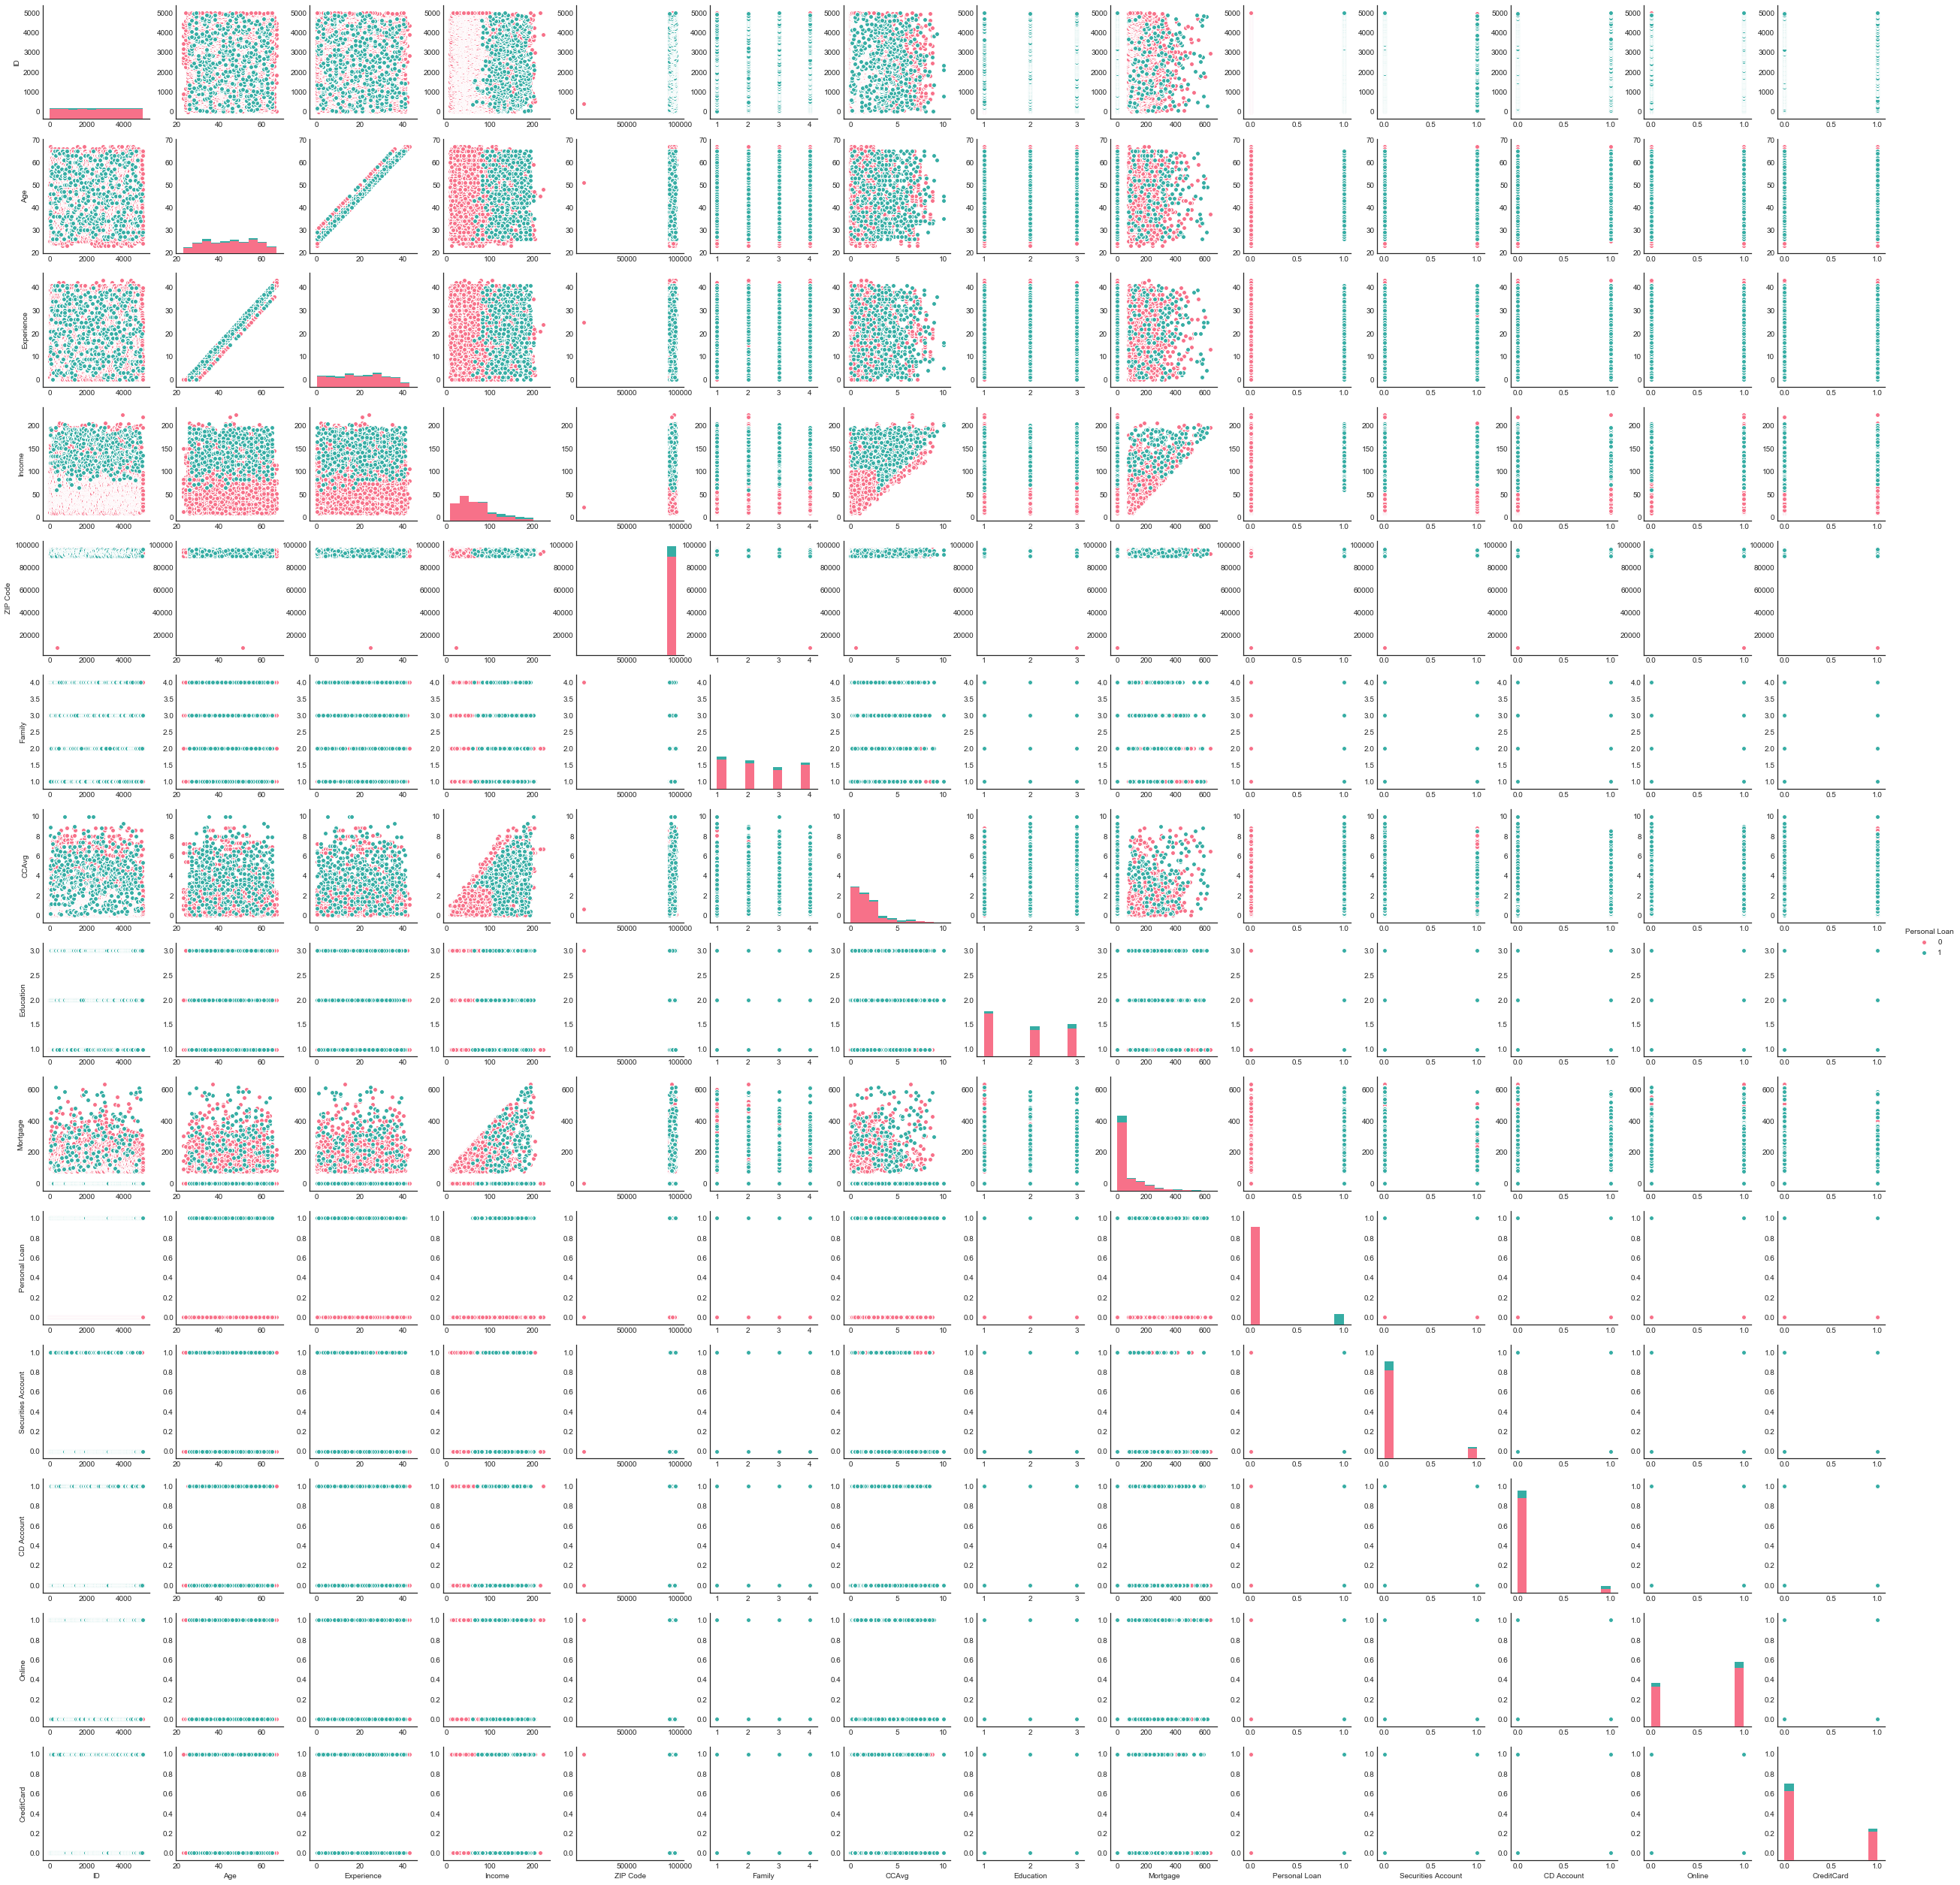

In [6]:
sns.pairplot(df, hue='Personal Loan', palette='husl')

From the above pairplot it is clear that Age and Experience have high collinearity between themselves. So, we can use one of them for the models.

In [7]:
## Remove ID column for use from all future pupose
cols_to_keep=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
df_temp = df[cols_to_keep]

# Logistic Regression
First we will build the logistic regression model and measure it's performance.
The feature engineering needs to be different than that of a decision tree.

In [8]:
## Get data for Logistic Regression
df_log = df_temp

### Find out outliers

(array([ 262.,  487.,  632.,  479.,  532.,  600.,  524.,  678.,  504.,  302.]), array([ 23. ,  27.4,  31.8,  36.2,  40.6,  45. ,  49.4,  53.8,  58.2,
        62.6,  67. ]), <a list of 10 Patch objects>)


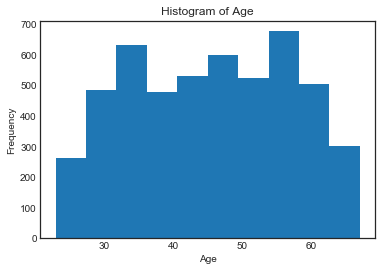

In [9]:
# Age
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
print(plt.hist(df_log['Age']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000001457A518>, <matplotlib.lines.Line2D object at 0x0000000018E4A710>], 'caps': [<matplotlib.lines.Line2D object at 0x0000000018DB1A90>, <matplotlib.lines.Line2D object at 0x0000000018DB1828>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000000145D6400>], 'medians': [<matplotlib.lines.Line2D object at 0x0000000018DDCA58>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000000018DDC208>], 'means': []}


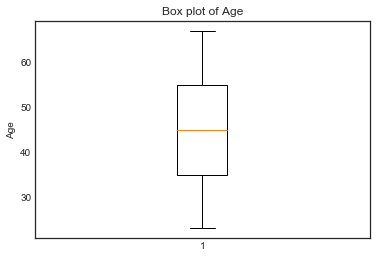

In [10]:
plt.title('Box plot of Age')
plt.ylabel('Age')
print(plt.boxplot(df_log['Age']))

(array([ 519.,  505.,  483.,  615.,  533.,  541.,  647.,  500.,  461.,  196.]), array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
        38.7,  43. ]), <a list of 10 Patch objects>)


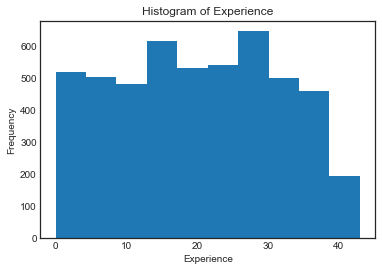

In [11]:
#Experience
plt.title('Histogram of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
print(plt.hist(df_log['Experience']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000001A809BE0>, <matplotlib.lines.Line2D object at 0x000000001A8110F0>], 'caps': [<matplotlib.lines.Line2D object at 0x000000001A811550>, <matplotlib.lines.Line2D object at 0x000000001A8119B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000001A809A58>], 'medians': [<matplotlib.lines.Line2D object at 0x000000001A811E10>], 'fliers': [<matplotlib.lines.Line2D object at 0x000000001A8162B0>], 'means': []}


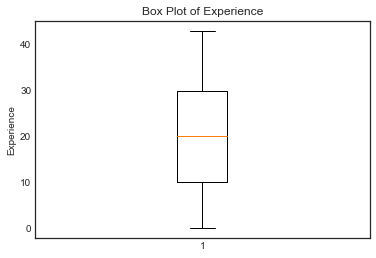

In [12]:
plt.title('Box Plot of Experience')
plt.ylabel('Experience')
print(plt.boxplot(df_log['Experience']))

(array([  802.,  1153.,   867.,   879.,   377.,   307.,   268.,   197.,
         141.,     9.]), array([   8. ,   29.6,   51.2,   72.8,   94.4,  116. ,  137.6,  159.2,
        180.8,  202.4,  224. ]), <a list of 10 Patch objects>)


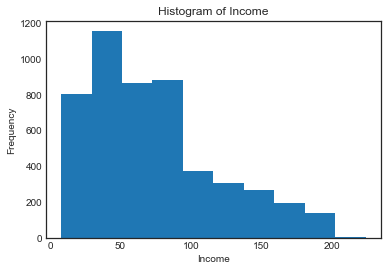

In [13]:
# Income
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
print(plt.hist(df_log['Income']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000001A8AF9E8>, <matplotlib.lines.Line2D object at 0x000000001A8AFF60>], 'caps': [<matplotlib.lines.Line2D object at 0x000000001A8B9438>, <matplotlib.lines.Line2D object at 0x000000001A8B98D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000001A8AF828>], 'medians': [<matplotlib.lines.Line2D object at 0x000000001A8B9D68>], 'fliers': [<matplotlib.lines.Line2D object at 0x000000001A8C1208>], 'means': []}


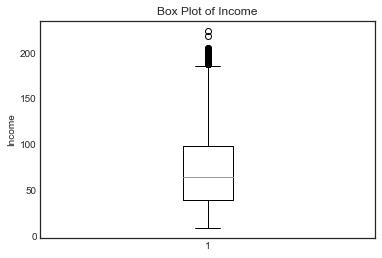

In [14]:
plt.title('Box Plot of Income')
plt.ylabel('Income')
print(plt.boxplot(df_log['Income']))

(array([ 1683.,  1376.,  1039.,   319.,   219.,    97.,   132.,    84.,
          45.,     6.]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]), <a list of 10 Patch objects>)


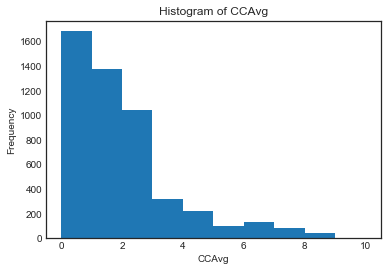

In [15]:
#CCAvg
plt.title('Histogram of CCAvg')
plt.xlabel('CCAvg')
plt.ylabel('Frequency')
print(plt.hist(df_log['CCAvg']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000001ABA3E10>, <matplotlib.lines.Line2D object at 0x000000001ABAC3C8>], 'caps': [<matplotlib.lines.Line2D object at 0x000000001ABAC860>, <matplotlib.lines.Line2D object at 0x000000001ABACCF8>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000001ABA3C50>], 'medians': [<matplotlib.lines.Line2D object at 0x000000001ABB21D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000000001ABB2668>], 'means': []}


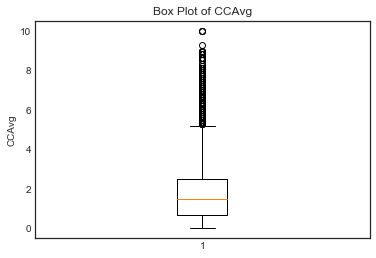

In [16]:
plt.title('Box Plot of CCAvg')
plt.ylabel('CCAvg')
print(plt.boxplot(df_log['CCAvg']))

(array([ 3462.,   566.,   428.,   254.,   127.,    73.,    46.,    20.,
          14.,    10.]), array([   0. ,   63.5,  127. ,  190.5,  254. ,  317.5,  381. ,  444.5,
        508. ,  571.5,  635. ]), <a list of 10 Patch objects>)


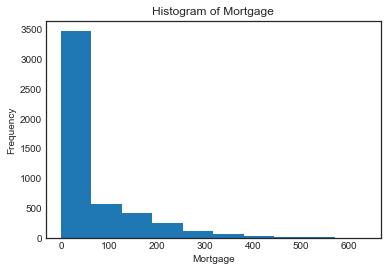

In [17]:
# Mortgage
plt.title('Histogram of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
print(plt.hist(df_log['Mortgage']))

{'boxes': [<matplotlib.lines.Line2D at 0x1a822c88>],
 'caps': [<matplotlib.lines.Line2D at 0x1a822c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a7e5978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a7e55f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a822860>,
  <matplotlib.lines.Line2D at 0x1a8224a8>]}

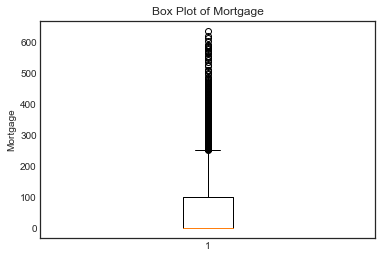

In [18]:
plt.title('Box Plot of Mortgage')
plt.ylabel('Mortgage')
plt.boxplot(df_log['Mortgage'])

From the above plots, it is clear that the attributes Mortgage, CCAvg and Income have outliers and need to be treated before proceeding for logistic regression.

### Outlier Treatment
Approach to outlier treatment:
Impute the outliers to thrid quartile

In [19]:
# Outlier Treatment of Income
sd = np.std(df_log.Income)
mean = np.mean(df_log.Income)
i = 0
for i in range(0,5000):
    if(df_log.Income[i] > (mean + (2*sd))):
        df_log['Income'][i] = (mean + (2*sd))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
# Outlier Treatment of CCAvg
sd = np.std(df_log.CCAvg)
mean = np.mean(df_log.CCAvg)
i = 0
for i in range(0,5000):
    if(df_log.CCAvg[i] > (mean + (2*sd))):
        df_log['CCAvg'][i] = (mean + (2*sd))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:

# Outlier Treatment of Mortgage 
sd = np.std(df_log.Mortgage)
mean = np.mean(df_log.Mortgage)
i = 0
for i in range(0,5000):
    if(df_log.Mortgage[i] > (mean + (2*sd))):
        df_log['Mortgage'][i] = (mean + (2*sd))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Get the box plots again for these variables and check if outliers have been treated

{'whiskers': [<matplotlib.lines.Line2D object at 0x000000001ABDBB70>, <matplotlib.lines.Line2D object at 0x000000001A8AFB00>], 'caps': [<matplotlib.lines.Line2D object at 0x000000001A8220F0>, <matplotlib.lines.Line2D object at 0x000000001ABBA400>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000001ABDB8D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000000001ABBAEB8>], 'fliers': [<matplotlib.lines.Line2D object at 0x000000001ABC67F0>], 'means': []}


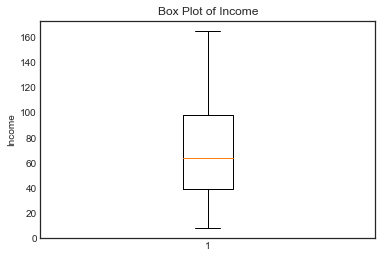

In [22]:
plt.title('Box Plot of Income')
plt.ylabel('Income')
print(plt.boxplot(df_log['Income']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000000145A1208>, <matplotlib.lines.Line2D object at 0x000000000F660F28>], 'caps': [<matplotlib.lines.Line2D object at 0x00000000107FBDD8>, <matplotlib.lines.Line2D object at 0x0000000015CE7400>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000001455AA90>], 'medians': [<matplotlib.lines.Line2D object at 0x000000001713E390>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000000145F32B0>], 'means': []}


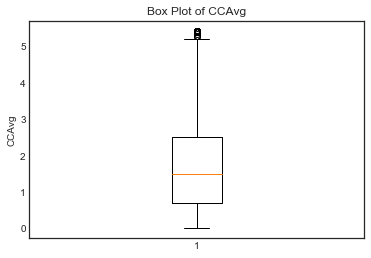

In [23]:
plt.title('Box Plot of CCAvg')
plt.ylabel('CCAvg')
print(plt.boxplot(df_log['CCAvg']))

{'boxes': [<matplotlib.lines.Line2D at 0x18dbf908>],
 'caps': [<matplotlib.lines.Line2D at 0x15b4c048>,
 'fliers': [<matplotlib.lines.Line2D at 0x17148748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x18d96898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x15ad9668>,
  <matplotlib.lines.Line2D at 0x17236ac8>]}

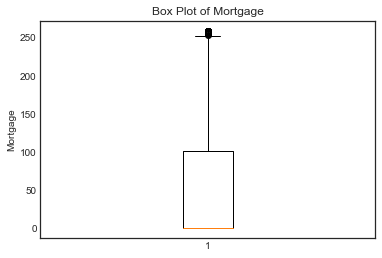

In [24]:
plt.title('Box Plot of Mortgage')
plt.ylabel('Mortgage')
plt.boxplot(df_log['Mortgage'])

In [25]:
# Drop Experience
final_vars = ['Age','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']
df_log_final = df_log[final_vars]
df_log_final.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [26]:
y = ['Personal Loan']
x = [i for i in final_vars if i not in y]
x

['Age',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

#### Split Data into train and test

In [27]:
array = df_log_final.values
X = array[:,[0,1,2,3,4,5,6,8,9,10,11]] # select all independent variables
Y = array[:,7]   # Select 9th Column dependent variable

In [28]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

### Implement the logistic regression model

In [29]:
logit_model = sm.Logit(y_train,X_train)
result_log = logit_model.fit()
print(result_log.summary())

Optimization terminated successfully.
         Current function value: 0.122894
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 02 Feb 2018   Pseudo R-squ.:                  0.6160
Time:                        23:34:29   Log-Likelihood:                -430.13
converged:                       True   LL-Null:                       -1120.1
                                        LLR p-value:                2.102e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0069      0.008      0.877      0.380      -0.009       0.022
x2             0.0627      0.

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)

In [32]:
print('Accuracy {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy 0.92


In [33]:
## Corss Validation

kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv = kfold, scoring = scoring)
print('10-Fold Corss Validation average accuracy: %.3f' % (results.mean()))

10-Fold Corss Validation average accuracy: 0.904


In [50]:
from sklearn.metrics import confusion_matrix

In [52]:
# Confusion Matrix
confusion_matrix_reg = confusion_matrix(y_test,y_pred)
print(confusion_matrix_reg)

[[1337   25]
 [ 102   36]]


In [35]:
## Classification report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.98      0.95      1362
        1.0       0.59      0.26      0.36       138

avg / total       0.90      0.92      0.90      1500



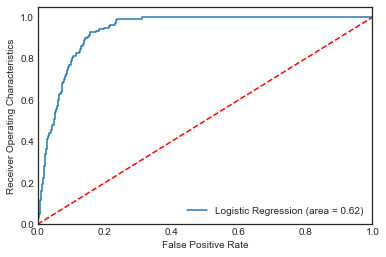

In [36]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thrsholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [37]:
df_bin = df

For Decision Tree, we have to create bins for continuous variables

In [38]:
## Bins for variable
df_bin['age_decile'] = pd.qcut(df_bin['Age'], 10, labels=False)
df_bin['exp_decile'] = pd.qcut(df_bin['Experience'], 10, labels=False)
df_bin['inc_decile'] = pd.qcut(df_bin['Income'], 10, labels=False)
df_bin['ccavg_decile'] = pd.qcut(df_bin['CCAvg'], 10, labels=False)
df_bin['mort_quantile'] = pd.qcut(df_bin['Mortgage'], 4, labels=False, duplicates = 'drop')
df_bin['pin_decile'] = pd.qcut(df_bin['ZIP Code'], 10, labels=False)

In [39]:
print(df_bin.columns.values)

['ID' 'Age' 'Experience' 'Income' 'ZIP Code' 'Family' 'CCAvg' 'Education'
 'Mortgage' 'Personal Loan' 'Securities Account' 'CD Account' 'Online'
 'CreditCard' 'age_decile' 'exp_decile' 'inc_decile' 'ccavg_decile'
 'mort_quantile' 'pin_decile']


In [40]:
df_bin.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,age_decile,exp_decile,inc_decile,ccavg_decile,mort_quantile,pin_decile
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,0,3,5,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,4,4,2,4,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,3,3,0,3,0,7
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,2,2,7,7,0,6
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,2,1,3,3,0,1


In [41]:
## Data slicing
array = df_bin.values
X = array[:,[5,7,10,11,12,13,14,15,16,17,18,19]] # select all independent variables
Y = array[:,9]   # Select 9th Columne dependent variable
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [42]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [43]:
y_pred_bin = clf_entropy.predict(X_test)
y_pred_bin

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [44]:
print('Accuracy {:.2f}'.format(clf_entropy.score(X_test,y_test)))

Accuracy 0.98


In [45]:
kfold_bin = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results_entropy = model_selection.cross_val_score(clf_entropy, X_train, y_train, cv = kfold_bin, scoring = scoring)
print('10-Fold Corss Validation average accuracy Decision Tree: %.3f' % (results_entropy.mean()))

10-Fold Corss Validation average accuracy Decision Tree: 0.970


In [53]:
## Confusion Matrix
confusion_matrix_bin = confusion_matrix(y_test,y_pred_bin)
print(confusion_matrix_bin)

[[1346   16]
 [  17  121]]


In [54]:
print(classification_report(y_test,y_pred_bin))

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1362
        1.0       0.88      0.88      0.88       138

avg / total       0.98      0.98      0.98      1500



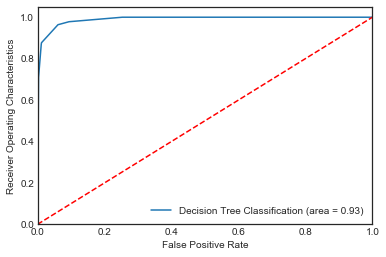

In [55]:
##ROC CUrve
bin_en_roc_auc = roc_auc_score(y_test, y_pred_bin)
fpr, tpr, thrsholds = roc_curve(y_test, clf_entropy.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Decision Tree Classification (area = %0.2f)' % bin_en_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('Bin_ROC')
plt.show()

## Conclusion:
From the above results and the model performance, we realise that Decision Tree is the better model to be employed for this use case.

# Ensembles

## RandomForest Classification

In [72]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [86]:
array_RF = df_temp.values

In [87]:
## Data slicing
X = array_RF[:,[0,2,3,4,5,6,7,9,10,11,12]] # select all independent variables
Y = array_RF[:,8]   # Select 9th Columne dependent variable
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [88]:
num_trees = 200
max_features = 11
kfold = model_selection.KFold(n_splits=10, random_state=seed)
RF_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [89]:
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
y_pred_RF

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [90]:
print('Accuracy {:.2f}'.format(RF_model.score(X_test,y_test)))

Accuracy 0.99


In [94]:
kfold_bin = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results_RF = model_selection.cross_val_score(RF_model, X_train, y_train, cv = kfold_bin, scoring = scoring)
print('10-Fold Corss Validation average accuracy Decision Tree: %.3f' % (results_RF.mean()))

10-Fold Corss Validation average accuracy Decision Tree: 0.987


In [95]:
print(classification_report(y_test,y_pred_RF))

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1362
        1.0       0.95      0.90      0.93       138

avg / total       0.99      0.99      0.99      1500



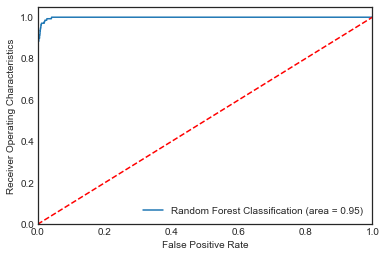

In [97]:
##ROC CUrve
rf_en_roc_auc = roc_auc_score(y_test, y_pred_RF)
fpr, tpr, thrsholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classification (area = %0.2f)' % rf_en_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# Conclusion:
From the above all three models we see that the best performing model is Random Forest followed by Decision Tree followed by Logistic Regression.
However, the difference between performance of Random Forest and Decision Trees is very marginal.